Второе задание из задавальника

In [15]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
"""
data generation 
n = 25
"""
n = 25
data_sample = np.random.exponential(scale=1.0, size=n)
print(data_sample)

[2.44925492 0.12977168 1.04401038 0.6495403  0.27856704 1.78778856
 1.45838845 0.32830002 0.19336103 0.10725503 0.05372693 0.42575415
 0.04783191 0.10138392 0.49086412 2.28788385 0.90161993 1.32162023
 0.27429065 0.11871732 1.66690892 2.96280484 0.60326508 0.33347613
 1.30964749]


Определить по выборке моду, медиану, размах, оценку коэффициента асимметрии

In [21]:
# мода
mode = stats.mode(data_sample)[0]
print("Мода:", mode)

# медиана
median = np.median(data_sample)
print("Медиана:", median)

# размах
range_value = np.max(data_sample) - np.min(data_sample)
print("Размах:", range_value)

# коэффициент асимметрии
skewness = stats.skew(data_sample)
print("Коэффициент асимметрии:", skewness)

Мода: 0.04783191052565878
Медиана: 0.4908641199193292
Размах: 2.914972925199546
Коэффициент асимметрии: 1.0338460162678003


Построить эмпирическую функцию распределения, гистограмму, boxplot

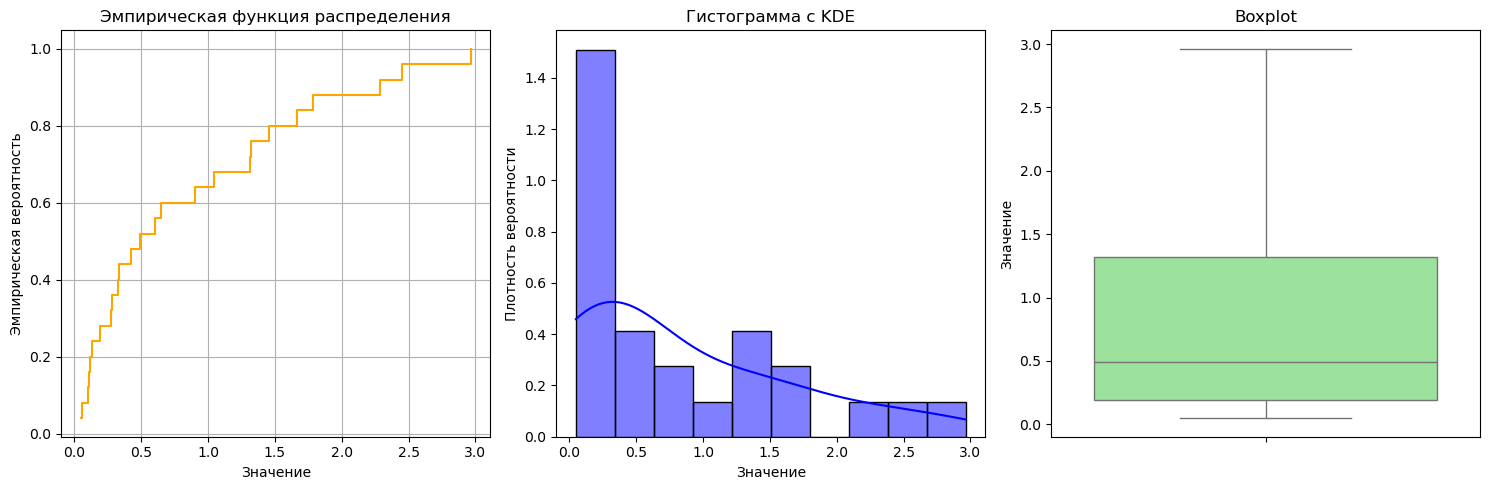

In [22]:
# 1. Эмпирическая функция распределения
plt.figure(figsize=(15, 5))

# Эмпирическая функция распределения
plt.subplot(1, 3, 1)
sorted_sample = np.sort(data_sample)
ecdf = np.arange(1, n + 1) / n
plt.step(sorted_sample, ecdf, label='Эмпирическая функция распределения', color='orange', where='post')
plt.title('Эмпирическая функция распределения')
plt.xlabel('Значение')
plt.ylabel('Эмпирическая вероятность')
plt.grid()

# 2. Гистограмма
plt.subplot(1, 3, 2)
sns.histplot(data_sample, bins=10, kde=True, color='blue', stat='density', edgecolor='black')
plt.title('Гистограмма с KDE')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')

# 3. Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(data=data_sample, color='lightgreen')
plt.title('Boxplot')
plt.ylabel('Значение')

plt.tight_layout()
plt.show()


Сравнение оценки плотности распределения среднего арифметического элементов выборки, полученной с помощью ЦПТ, с бутстраповской оценкой этой плотности.

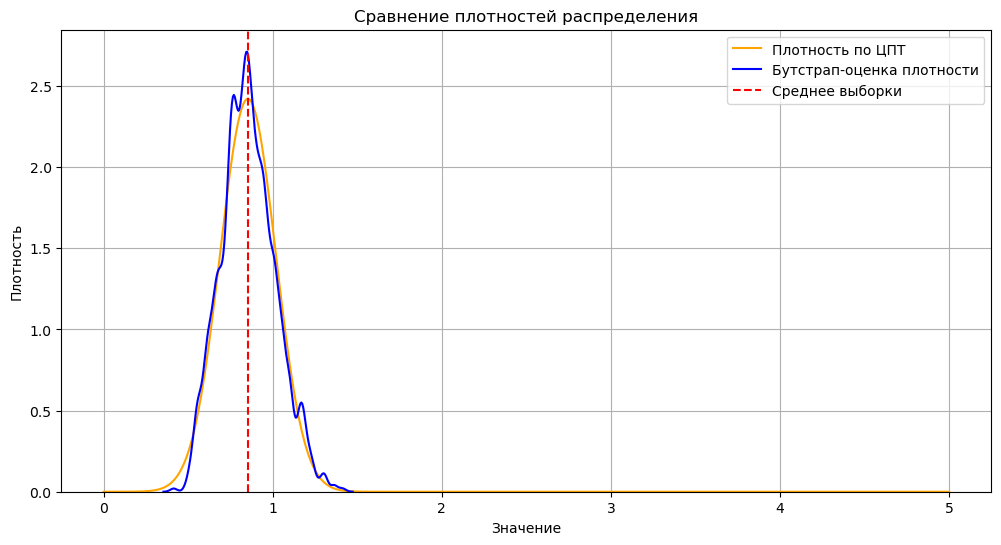

In [23]:
from scipy.stats import norm

num_bootstrap_samples = 1000 

sample_mean = np.mean(data_sample)

bootstrap_means = []
for _ in range(num_bootstrap_samples):
    bootstrap_sample = np.random.choice(data_sample, size=n, replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))


plt.figure(figsize=(12, 6))

mu = np.mean(data_sample)
sigma = np.std(data_sample) / np.sqrt(n)

x = np.linspace(0, 5, 1000)
cpt_density = norm.pdf(x, mu, sigma)

plt.plot(x, cpt_density, label='Плотность по ЦПТ', color='orange')

sns.kdeplot(bootstrap_means, label='Бутстрап-оценка плотности', color='blue', bw_adjust=0.5)

plt.axvline(sample_mean, color='red', linestyle='--', label='Среднее выборки')
plt.title('Сравнение плотностей распределения')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()
plt.grid()
plt.show()